In [41]:
# -------------------- #
# Imports              #
# -------------------- #

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

In [72]:
# -------------------- #
# Settings             #
# -------------------- #

#folder = "Stromboli_Outputs/Test_Orbit_Stable_Node2011/Output/"
folder = "Outputs/"
savefolder = "Stromboli_Plots/Orbit_Stable_Node2011/"

N = 8

config = "config-MPI_Test_2"
appendix = "p_4"
steps = 2000
printstep = 10
delta = 0.0005
epsilon = 0.01
setup_name = "Before"

config_2 = "config-MPI_Test_2"
appendix_2 = "p_4_2"
steps_2 = 2000
printstep_2 = 10
delta_2 = 0.0005
epsilon_2 = 0.01
setup_2_name = "After"

plot_step = 1
save = False

plot_max = int(steps/printstep/plot_step)
step_increment = int(printstep*plot_step)

#setup = config + "_N-" + str(N) + "_steps-" + str(steps) + "_printStep-" + str(printstep) + "_delta-" + "{:10.8f}".format(delta) + "_epsilon-" + "{:16.14f}".format(epsilon)
#setup_2 = config_2 + "_N-" + str(N) + "_steps-" + str(steps_2) + "_printStep-" + str(printstep_2) + "_delta-" + "{:10.8f}".format(delta_2) + "_epsilon-" + "{:16.14f}".format(epsilon_2)
setup = config + "_" + appendix
setup_2 = config_2 + "_" + appendix_2

savename = savefolder + setup + "_plot.png"
savename_energy = savefolder + setup + "_energy.png"
savename_video = savefolder + setup + "_movie.mp4"
savename_2 = savefolder + setup_2 + "_plot.png"
savename_2_energy = savefolder + setup_2 + "_energy.png"
savename_2_video = savefolder + setup_2 + "_movie.mp4"
savename_diff = savefolder + "Diff_" + setup + "_-_" + setup_name + "_" + setup_2_name + ".png"
savename_energy_comparison = savefolder + "Energy_" + setup + "_-_" + setup_name + "_" + setup_2_name + ".png"

### Show energy plots

<IPython.core.display.Javascript object>


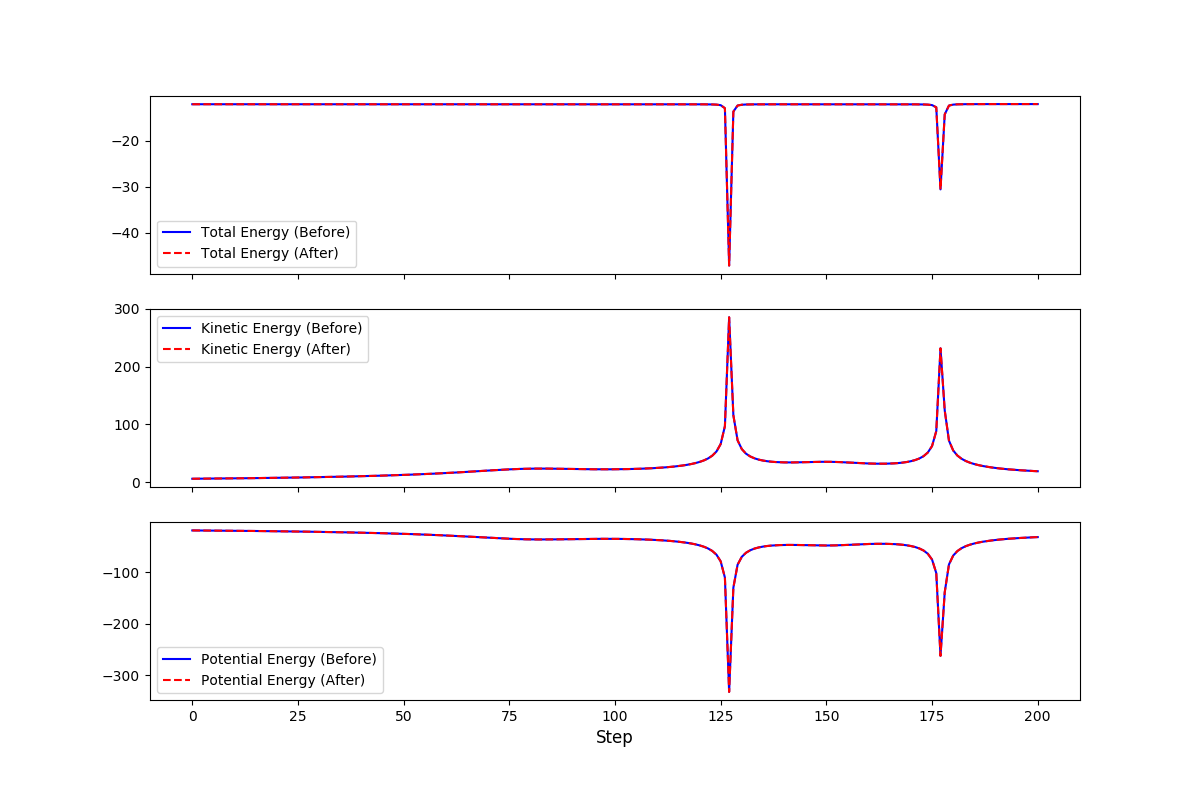

In [73]:
%matplotlib notebook

filename_energy_full = folder + setup + "_energy.txt"
energy = np.genfromtxt(filename_energy_full, delimiter=" | ")

filename_2_energy_full = folder + setup_2 + "_energy.txt"
energy_2 = np.genfromtxt(filename_2_energy_full, delimiter=" | ")

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, figsize=(12,8), dpi=80)

ax1.plot(energy[:,2], label="Total Energy (" + setup_name + ")", c="b")
ax2.plot(energy[:,0], label="Kinetic Energy (" + setup_name + ")", c="b")
ax3.plot(energy[:,1], label="Potential Energy (" + setup_name + ")", c="b")

ax1.plot(energy_2[:,2], label="Total Energy (" + setup_2_name + ")", c="r", ls="--")
ax2.plot(energy_2[:,0], label="Kinetic Energy (" + setup_2_name + ")", c="r", ls="--")
ax3.plot(energy_2[:,1], label="Potential Energy (" + setup_2_name + ")", c="r", ls="--")

ax1.legend(loc="best")
ax2.legend(loc="best")
ax3.legend(loc="best")

plt.xlabel("Step", fontsize=12)

if (save):
    plt.savefig(savename_energy_comparison, dpi=400, bbox_inches='tight')
    
plt.show()

### Save the plots showing the energies for both setups individually

In [74]:
%matplotlib inline
filename_energy_full = folder + setup + "_energy.txt"
energy = np.genfromtxt(filename_energy_full, delimiter=" | ")

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, figsize=(12,8), dpi=80)

ax1.plot(energy[:,2], label="Total Energy (" + setup_name + ")")
ax1.legend(loc="best")
ax2.plot(energy[:,0], label="Kinetic Energy (" + setup_name + ")")
ax2.legend(loc="best")
ax3.plot(energy[:,1], label="Potential Energy (" + setup_name + ")")
ax3.legend(loc="best")

plt.xlabel("Step", fontsize=12)

if (save):
    plt.savefig(savename_energy, dpi=400, bbox_inches='tight')
    
plt.close()

filename_2_energy_full = folder + setup_2 + "_energy.txt"
energy_2 = np.genfromtxt(filename_2_energy_full, delimiter=" | ")

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, figsize=(12,8), dpi=80)

ax1.plot(energy_2[:,2], label="Total Energy (" + setup_2_name + ")")
ax1.legend(loc="best")
ax2.plot(energy_2[:,0], label="Kinetic Energy (" + setup_2_name + ")")
ax2.legend(loc="best")
ax3.plot(energy_2[:,1], label="Potential Energy (" + setup_2_name + ")")
ax3.legend(loc="best")

plt.xlabel("Step", fontsize=12)

if (save):
    plt.savefig(savename_2_energy, dpi=400, bbox_inches='tight')
    
plt.close()

### Function for animated plotting of simulation data

In [75]:
def animated_plot(k):
    # Init plot
    if(k==0):
        plt.xlabel("x", fontsize=16)
        plt.ylabel("y", fontsize=16)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(b=True)
        
    # First real plot
    elif (k==1):
        for i in range(0,size):
            
            if not animated_plot.simple:       
                l_h, = plt.plot(animated_plot.arr[i][0][0],animated_plot.arr[i][1][0], label=str(i+1), ls="-", lw=1)
                animated_plot.lines_hist.append(l_h)
                
            l_c, = plt.plot(animated_plot.arr[i][0][0],animated_plot.arr[i][1][0], marker="o", markersize=5, c="k")
            animated_plot.lines_curr.append(l_c)
            
            if(i==0):
                animated_plot.xmax_tot = animated_plot.arr[i][0][0]
                animated_plot.xmin_tot = animated_plot.arr[i][0][0]
                animated_plot.ymax_tot = animated_plot.arr[i][1][0]
                animated_plot.ymin_tot = animated_plot.arr[i][1][0]

                if (animated_plot.xmax_tot < 0):
                    animated_plot.xmax_tot = animated_plot.xmax_tot*0.9
                else:
                    animated_plot.xmax_tot = animated_plot.xmax_tot*1.1
                if (animated_plot.xmin_tot < 0):
                    animated_plot.xmin_tot = animated_plot.xmin_tot*1.1
                else:
                    animated_plot.xmin_tot = animated_plot.xmin_tot*0.9
                if (animated_plot.ymax_tot < 0):
                    animated_plot.ymax_tot = animated_plot.ymax_tot*0.9
                else:
                    animated_plot.ymax_tot = animated_plot.ymax_tot*1.1
                if (animated_plot.ymin_tot < 0):
                    animated_plot.ymin_tot = animated_plot.ymin_tot*1.1
                else:
                    animated_plot.ymin_tot = animated_plot.ymin_tot*0.9
            else:    
                animated_plot.xmax = animated_plot.arr[i][0][0]
                animated_plot.xmin = animated_plot.arr[i][0][0]
                animated_plot.ymax = animated_plot.arr[i][1][0]
                animated_plot.ymin = animated_plot.arr[i][1][0]

                if (animated_plot.xmax < 0):
                    animated_plot.xmax = animated_plot.xmax*0.9
                else:
                    animated_plot.xmax = animated_plot.xmax*1.1
                if (animated_plot.xmin < 0):
                    animated_plot.xmin = animated_plot.xmin*1.1
                else:
                    animated_plot.xmin = animated_plot.xmin*0.9
                if (animated_plot.ymax < 0):
                    animated_plot.ymax = animated_plot.ymax*0.9
                else:
                    animated_plot.ymax = animated_plot.ymax*1.1
                if (animated_plot.ymin < 0):
                    animated_plot.ymin = animated_plot.ymin*1.1
                else:
                    animated_plot.ymin = animated_plot.ymin*0.9

                if(animated_plot.xmax > animated_plot.xmax_tot):
                    animated_plot.xmax_tot = animated_plot.xmax
                if(animated_plot.xmin < animated_plot.xmin_tot):
                    animated_plot.xmin_tot = animated_plot.xmin
                if(animated_plot.ymax > animated_plot.ymax_tot):
                    animated_plot.ymax_tot = animated_plot.ymax
                if(animated_plot.ymin < animated_plot.ymin_tot):
                    animated_plot.ymin_tot = animated_plot.ymin

        if (size<10):
            plt.legend(loc="best", fontsize=14)

        plt.xlim(animated_plot.xmin_tot, animated_plot.xmax_tot)
        plt.ylim(animated_plot.ymin_tot, animated_plot.ymax_tot)
        plt.title("Step: " + str(0) + " / " + str(steps) + " - Delta: " + str(delta), fontsize=18)
        fig.canvas.draw()
        
    else:
        
        for i in range(0,size):
            animated_plot.lines_curr[i].set_xdata(animated_plot.arr[i][0][(k-1)*animated_plot.plotstep])
            animated_plot.lines_curr[i].set_ydata(animated_plot.arr[i][1][(k-1)*animated_plot.plotstep])
            
            if (animated_plot.simple):                 
                animated_plot.xmax = np.max(animated_plot.arr[i][0][(k-1)*animated_plot.plotstep])
                animated_plot.xmin = np.min(animated_plot.arr[i][0][(k-1)*animated_plot.plotstep])
                animated_plot.ymax = np.max(animated_plot.arr[i][1][(k-1)*animated_plot.plotstep])
                animated_plot.ymin = np.min(animated_plot.arr[i][1][(k-1)*animated_plot.plotstep])
            else:                
                animated_plot.lines_hist[i].set_xdata(animated_plot.arr[i][0][0:(k-1)*animated_plot.plotstep])
                animated_plot.lines_hist[i].set_ydata(animated_plot.arr[i][1][0:(k-1)*animated_plot.plotstep])
                animated_plot.xmax = np.max(animated_plot.arr[i][0][0:(k-1)*animated_plot.plotstep])
                animated_plot.xmin = np.min(animated_plot.arr[i][0][0:(k-1)*animated_plot.plotstep])
                animated_plot.ymax = np.max(animated_plot.arr[i][1][0:(k-1)*animated_plot.plotstep])
                animated_plot.ymin = np.min(animated_plot.arr[i][1][0:(k-1)*animated_plot.plotstep])

            if (animated_plot.xmax < 0):
                animated_plot.xmax = animated_plot.xmax*0.9
            else:
                animated_plot.xmax = animated_plot.xmax*1.1
            if (animated_plot.xmin < 0):
                animated_plot.xmin = animated_plot.xmin*1.1
            else:
                animated_plot.xmin = animated_plot.xmin*0.9
            if (animated_plot.ymax < 0):
                animated_plot.ymax = animated_plot.ymax*0.9
            else:
                animated_plot.ymax = animated_plot.ymax*1.1
            if (animated_plot.ymin < 0):
                animated_plot.ymin = animated_plot.ymin*1.1
            else:
                animated_plot.ymin = animated_plot.ymin*0.9

            if(animated_plot.xmax > animated_plot.xmax_tot):
                animated_plot.xmax_tot = animated_plot.xmax
            if(animated_plot.xmin < animated_plot.xmin_tot):
                animated_plot.xmin_tot = animated_plot.xmin
            if(animated_plot.ymax > animated_plot.ymax_tot):
                animated_plot.ymax_tot = animated_plot.ymax
            if(animated_plot.ymin < animated_plot.ymin_tot):
                animated_plot.ymin_tot = animated_plot.ymin

        plt.xlim(animated_plot.xmin_tot, animated_plot.xmax_tot)
        plt.ylim(animated_plot.ymin_tot, animated_plot.ymax_tot)
        plt.title("Step: " + str(((k-1)*animated_plot.plotstep)*animated_plot.printstep) + " / " + str(steps) + " - Delta: " + str(delta), fontsize=18)
        fig.canvas.draw()

### Read in simulation data for setup 1 and generate animated plot

In [76]:
filename_full = folder + setup + "_output.txt"
# lines_split will contain one list for each masspoint, containing all positions and velocities of that masspoint for each step
lines_split = []

checksize=True
# Total number of mass points
size = 0

# Output format contains config before the first "---",
# all masses before the second "---" and afterwards only the 6 coordinates and momenta per masspoint
counterSections = 0
storeData = False
with open(filename_full, 'r') as file:
    for line in file:        
        line = line.rstrip()    
        if (line == "---"):
            counterMasspoints = 0
            counterSections = counterSections + 1
            # If the second "---" is reached, the lines containing the coordinates and momenta begin, therefore
            # start storing data
            if (counterSections == 2):
                storeData = True
            # If the third "---" is reached, all mass points have been read in once, therefore no new list 
            # (for a new mass point) has to be appended, just append data to existing lists
            if (counterSections == 3):
                checksize = False                    
        elif (storeData):
            counterMasspoints = counterMasspoints + 1
            s = line.split()

            # If checksize is true, no "---" appeared in the file so far, i.e. the current line contains data of a "new" 
            # masspoint (that was not read in yet -> append new list to lines_split for that masspoint)
            if(checksize):
                lines_split.append([])
                # The list for each masspoint contains 6 lists with the values of pos_x, pos_y, pos_z, vel_x, vel_y, vel_z
                # (there is no need to store the number or the mass of the masspoint each time)
                for k in range(0,6):
                    lines_split[int(counterMasspoints)-1].append([])
                # Determine total number of masspoints by counting the number of mass points 
                # until first "---" appears in file
                size = counterMasspoints

            for k in range(0,6):
                lines_split[int(counterMasspoints)-1][k].append(s[k])

arr = np.array(lines_split, dtype="float64")
arr.shape

(8, 6, 201)

<IPython.core.display.Javascript object>


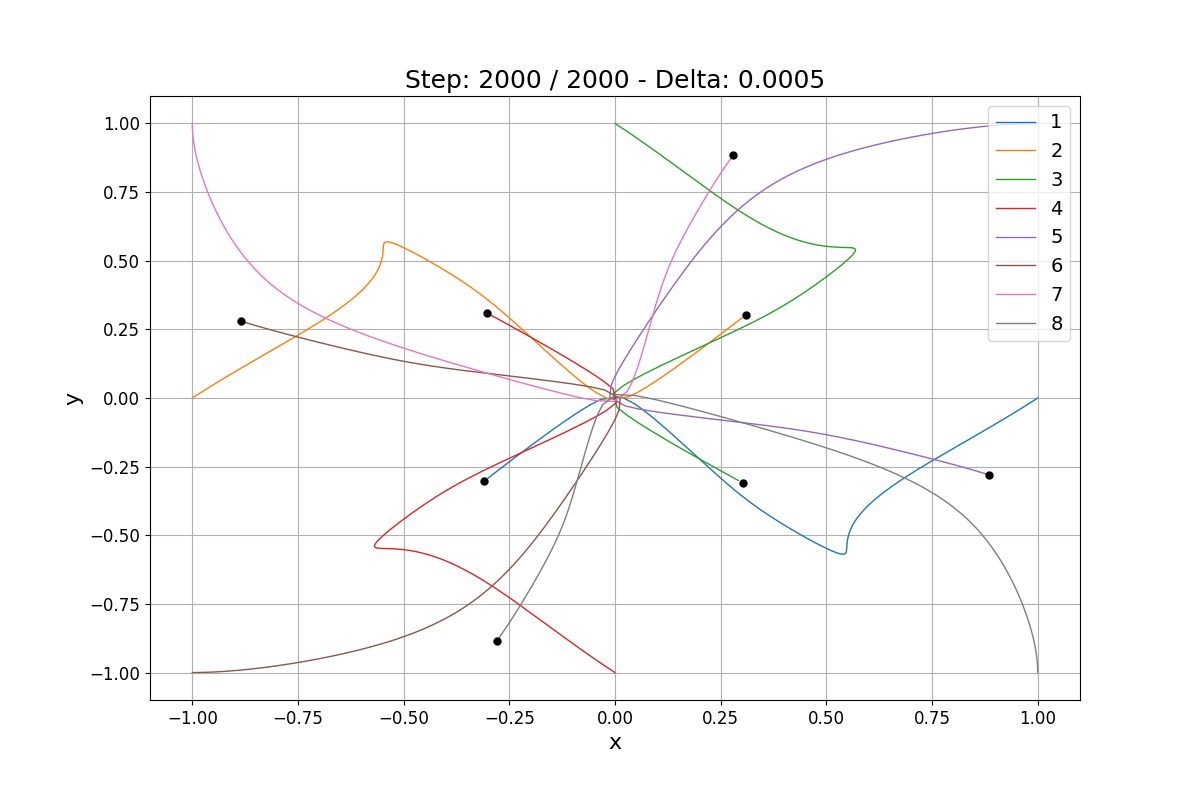

In [40]:
%matplotlib notebook

fig = plt.figure(figsize=(12,8), dpi=80) 

animated_plot.simple = False
animated_plot.plotstep = plot_step
animated_plot.printstep = printstep
animated_plot.arr = arr

animated_plot.lines_hist = []
animated_plot.lines_curr = []
animated_plot.xmin_tot=0
animated_plot.xmax_tot=0
animated_plot.ymin_tot=0
animated_plot.ymax_tot=0

if (save):
    #Writer = animation.writers['ffmpeg']
    #writer = Writer(fps=20, bitrate=1800)
    ani = animation.FuncAnimation(fig, animated_plot, frames=int(plot_max+2), repeat=False)
    ani.save(savename_video, writer=writer)
else:
    animated_plot(0)
    for i in range(1,plot_max + 2):        
        animated_plot(i)

### Read in simulation data for setup 2 and generate animated plot

In [77]:
filename_full_2 = folder + setup_2 + "_output.txt"
# lines_split will contain one list for each masspoint, containing all positions and velocities of that masspoint for each step
lines_split = []

checksize=True
# Total number of mass points
size = 0

# Output format contains config before the first "---",
# all masses before the second "---" and afterwards only the 6 coordinates and momenta per masspoint
counterSections = 0
storeData = False
with open(filename_full_2, 'r') as file:
    for line in file:        
        line = line.rstrip()    
        if (line == "---"):
            counterMasspoints = 0
            counterSections = counterSections + 1
            # If the second "---" is reached, the lines containing the coordinates and momenta begin, therefore
            # start storing data
            if (counterSections == 2):
                storeData = True
            # If the third "---" is reached, all mass points have been read in once, therefore no new list 
            # (for a new mass point) has to be appended, just append data to existing lists
            if (counterSections == 3):
                checksize = False                    
        elif (storeData):
            counterMasspoints = counterMasspoints + 1
            s = line.split()

            # If checksize is true, no "---" appeared in the file so far, i.e. the current line contains data of a "new" 
            # masspoint (that was not read in yet -> append new list to lines_split for that masspoint)
            if(checksize):
                lines_split.append([])
                # The list for each masspoint contains 6 lists with the values of pos_x, pos_y, pos_z, vel_x, vel_y, vel_z
                # (there is no need to store the number or the mass of the masspoint each time)
                for k in range(0,6):
                    lines_split[int(counterMasspoints)-1].append([])
                # Determine total number of masspoints by counting the number of mass points 
                # until first "---" appears in file
                size = counterMasspoints

            for k in range(0,6):
                lines_split[int(counterMasspoints)-1][k].append(s[k])

arr_2 = np.array(lines_split, dtype="float64")
arr_2.shape

(8, 6, 201)

<IPython.core.display.Javascript object>


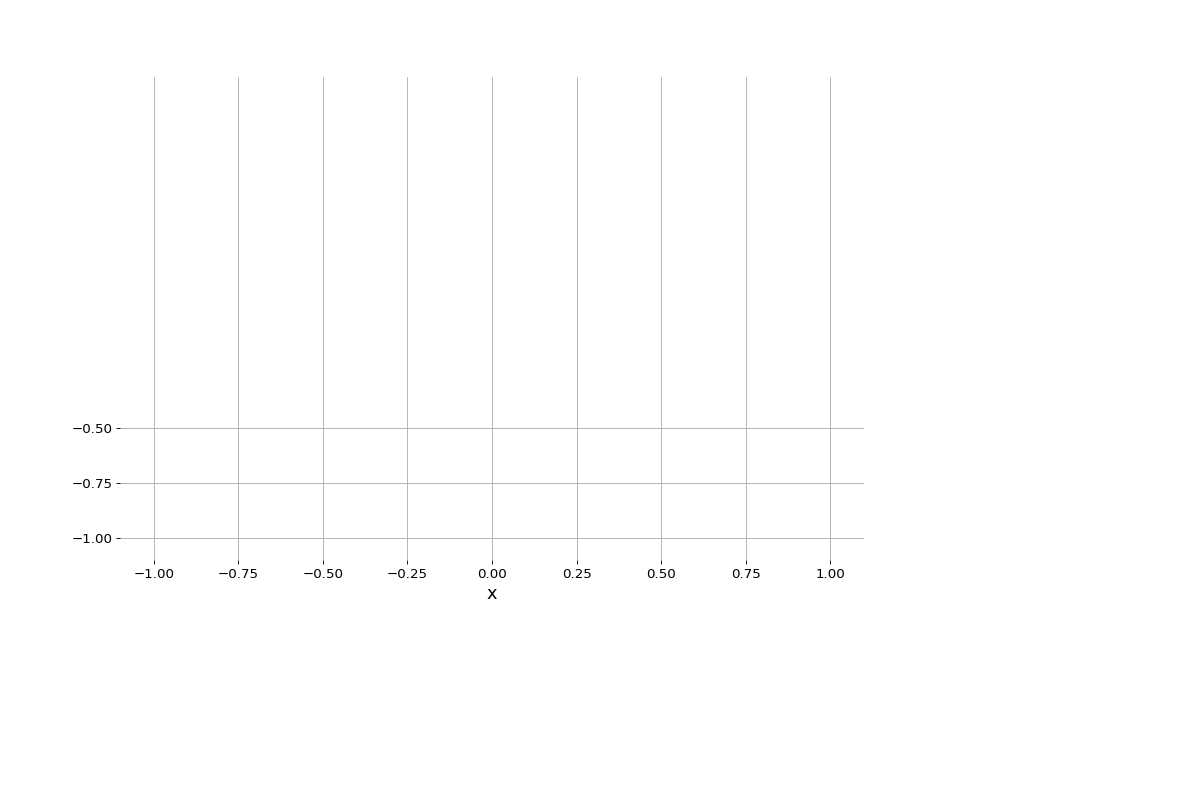

KeyboardInterrupt: 

In [78]:
%matplotlib notebook

fig = plt.figure(figsize=(12,8), dpi=80) 

animated_plot.simple = False
animated_plot.plotstep = plot_step
animated_plot.printstep = printstep_2
animated_plot.arr = arr_2

animated_plot.lines_hist = []
animated_plot.lines_curr = []
animated_plot.xmin_tot=0
animated_plot.xmax_tot=0
animated_plot.ymin_tot=0
animated_plot.ymax_tot=0

if (save):
    #Writer = animation.writers['ffmpeg']
    #writer = Writer(fps=20, bitrate=1800)
    ani = animation.FuncAnimation(fig, animated_plot, frames=int(plot_max+2), repeat=False)
    ani.save(savename_2_video, writer=writer)
else:
    animated_plot(0)
    for i in range(1,plot_max + 2):        
        animated_plot(i)

### Compute and display difference between masspoint positions of the two setups

In [79]:
def calcDiff(arr_1, arr_2):
    [masses, dim, steps] = arr_1.shape
    diff = np.zeros(steps, dtype="float32")
    for i in range(0,steps):
        d = 0
        for k in range(0,masses):
            d = d + ( (arr_1[k, 0, i] - arr_2[k, 0, i])**2 + (arr_1[k, 1, i] - arr_2[k, 1, i])**2 + (arr_1[k, 2, i] - arr_2[k, 2, i])**2 )**0.5
        diff[i] = d
    return diff

In [80]:
d = calcDiff(arr, arr_2)
np.max(d)

0.0

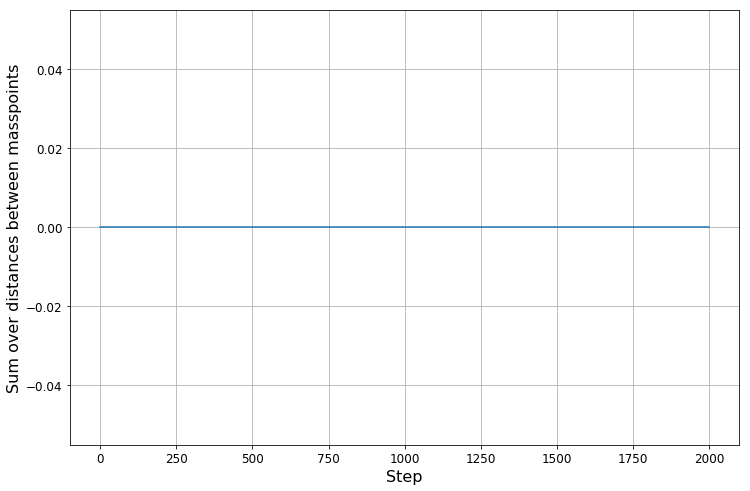

In [81]:
%matplotlib inline
fig = plt.figure(figsize=(12,8), dpi=80)

plt.xlabel("Step", fontsize=16)
plt.ylabel("Sum over distances between masspoints", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.plot(range(0,d.shape[0]*step_increment,step_increment),d)
if (save):
    plt.savefig(savename_diff, dpi=400, bbox_inches='tight')